In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [2]:
# Defining the model function
def expfunc(x, a, b):
    return a*(1-np.exp(-b*x))

def expfit(xinc, yinc):
    popt, proc = curve_fit(expfunc, xinc, yinc, p0=(1, 1))
    new_y = expfunc(xinc, *popt)
    return new_y, popt

In [3]:
# Import the data
df1 = pd.read_excel('AdvHisExp.xlsx', header=1, sheet_name='G1')
df2 = pd.read_excel('AdvHisExp.xlsx', header=1, sheet_name='G2')

print(df1['Ads'])
print(df2['Exposures'])
# Choosing x, and y values for fitting
xinc=np.array(df1['Ads'])
yinc=np.array(df2['Exposures'])

print(xinc,yinc)


y_predicted, popt = expfit(xinc, yinc)


0      1
1      8
2     20
3     50
4    100
Name: Ads, dtype: int64
0      4.7
1     22.1
2     48.7
3     90.3
4    130.5
Name: Exposures, dtype: float64
[  1   8  20  50 100] [  4.7  22.1  48.7  90.3 130.5]


/var/folders/nk/k6fq4zkd6lxfpjmy32h3lk0w0000gn/T/ipykernel_25032/2748393306.py:3: RuntimeWarning: overflow encountered in exp
  return a*(1-np.exp(-b*x))


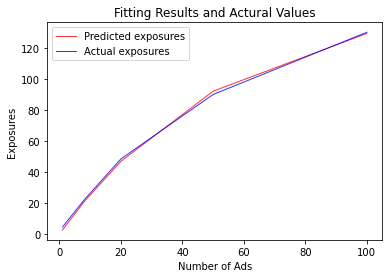

[1.55017436e+02 1.81430163e-02]


In [4]:
# Ploting the fitting results and actural values
plt.plot(xinc,y_predicted, color='red', alpha=.8, label='Predicted exposures', linewidth=1)
plt.plot(xinc,yinc, color='blue', alpha=.8, label='Actual exposures', linewidth=1)
plt.legend(loc='upper left')
plt.title('Fitting Results and Actural Values')
plt.xlabel('Number of Ads')
plt.ylabel('Exposures')


plt.show()

print(popt)